# Visualize Eddy Field and Cruise Transect

Output from daily_eddy_id.py will be used to visualize the eddy field in this notebook. Functions are imported from the transect_visualization.py script. 

Lexi Jones

In [1]:
import datetime,csv
import numpy as np
import matplotlib.pyplot as plt

from functions_for_transect_visualization import distance_from_lat_lon, bearing_from_lat_lon, find_lat_lon_end_point,\
plot_eddy_field_transect,plot_eddy_field_transect_zoom,get_locations_along_traj,check_if_in_eddy,\
check_if_in_RCLV,traj_eddy_intersection_pts,transect_eddy_action

## Stations

In [2]:
station_lats = [32.43,26.75,22,18.75,15,12.25,9]
station_lons = [-117.16,-126.75,-134,-140,-140,-140,-140]
station_arrivals = [datetime.datetime(2021,11,20,12,30),\
                    datetime.datetime(2021,11,22,14,0),\
                    datetime.datetime(2021,11,24,3,0),\
                    datetime.datetime(2021,11,26,8,30),\
                    datetime.datetime(2021,11,27,3,0),\
                    datetime.datetime(2021,11,29,6,0)]

station_departures = [datetime.datetime(2021,11,18,8,0),\
                      station_arrivals[0] + datetime.timedelta(hours=7),\
                      station_arrivals[1] + datetime.timedelta(hours=4),\
                      station_arrivals[2] + datetime.timedelta(hours=34),\
                      station_arrivals[3] + datetime.timedelta(hours=4),\
                      station_arrivals[4] + datetime.timedelta(hours=34)]

## Plot current eddy field

In [3]:
date = '20211115' # <---- CHANGE THIS TO CURRENT DATE
date_dashed = '%s-%s-%s'%(date[0:4],date[4:6],date[6:8])

In [4]:
datetime_date = datetime.datetime(int(date[0:4]),int(date[4:6]),int(date[6:8]))
date_back_30days = str(datetime_date - datetime.timedelta(days=30))[0:10].replace('-','') #OceanEddies is hard-coded to look back 30 days 


Load SSH eddy data

In [5]:
eddy_dir = './OceanEddies/OceanEddiesOutput/%s/Data/'%(date)
anti_eddy_data,cyc_eddy_data = [],[] #set up two empty arrays to read in the data

#First I'm opening the anticyclonic dataset and reading the first decade of data into an array
with open(eddy_dir + 'anticyc_eddy_data_minage3_%s_to_%s.csv'%(date_back_30days,date)) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    
    print('Reading anticyclonic eddy file...')
    
    i = 0
    for row in csv_reader:
        if (i == 0) or (i == 1):
            print(row) #this is just to check the header; there will be 'empty' columns because the boundary coords will take up many columns
        else:
            anti_eddy_data.append(row)
        i += 1
        
# Now I'm just doing the same thing for the cyclonic eddy data
with open(eddy_dir + 'cyclonic_eddy_data_minage3_%s_to_%s.csv'%(date_back_30days,date)) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    
    print('Reading cyclonic eddy file...')
    
    for row in csv_reader:
        cyc_eddy_data.append(row)
        
anti_eddy_data = np.array(anti_eddy_data)
cyc_eddy_data = np.array(cyc_eddy_data)

Reading anticyclonic eddy file...
['Date', 'Eddy ID', 'Age (days)', 'Area (km^2)', 'Ls (km)', 'Center Lon', 'Center Lat', 'Amplitude (cm)', 'Translation Speed (m/s)', 'Boundary Coords', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['20211016', '1', '1', '24762.9038258801', '88.7821890831492', '-163.66794792125', '19.6166822763357', '2.68823529411765', '9.5370367349103', '195.375', '19.125', '195.625', '18.875', '195.875', '18.625', '196.125', '18.625', '196.375', '18.875', '196.625', '18.875', '196.625', '19.125', '196.625', '19.375', '196.625', '19.625', '196.625', '19.875', '196.625', '20.125', '196.375', '20.375', '196.125', '20.375', '195.875', '20.125'

Load RCLV data

In [6]:
rclv_dir = './RCLVs/'
cons = np.load('%s%s_CONS_min_dist_40_min_area_24_def_tol_0.005_targetCD_0.01_8days_backward_runtime_20min_timestep_particle_start_lat_10_33_lon_-150_-117_spatial_step_0.03125_6hr_output_freq.npy'%(rclv_dir,date_dashed),allow_pickle=True)
plms = np.load('%s%s_PLM_min_dist_40_min_area_24_def_tol_0.005_targetCD_0.01_8days_backward_runtime_20min_timestep_particle_start_lat_10_33_lon_-150_-117_spatial_step_0.03125_6hr_output_freq.npy'%(rclv_dir,date_dashed),allow_pickle=True)

<AxesSubplot:title={'center':'11-15-2021 Eddy Field'}, xlabel='Longitude', ylabel='Latitude'>

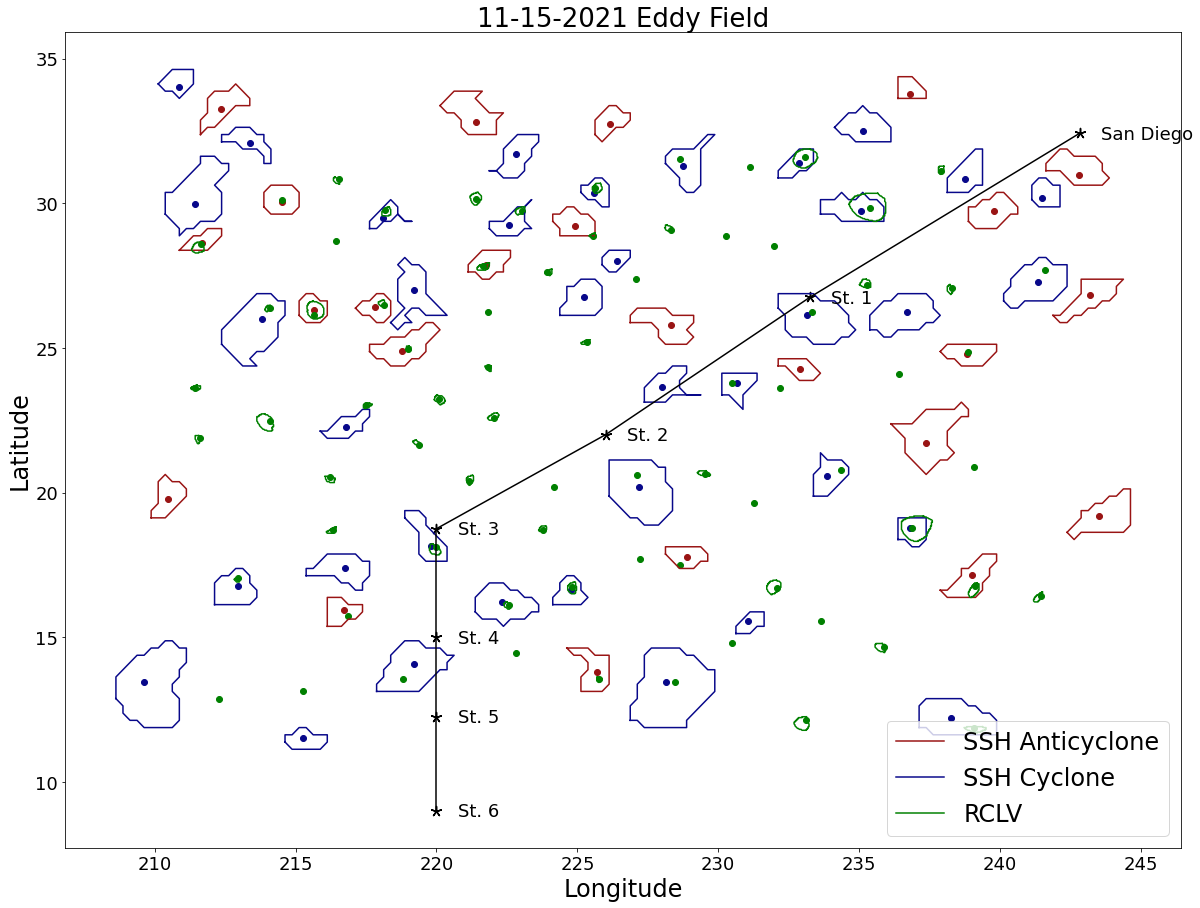

In [7]:
plot_eddy_field_transect(date,station_lats,station_lons,anti_eddy_data,cyc_eddy_data,cons,plms,0)

/Users/lexijones/Dropbox (MIT)/Grad_School/Research/Gradients4/live_eddy_tracking/functions_for_transect_visualization.py:103: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(lon_array,lat_array,LAVD_reshape,cmap='inferno',vmax=0.00001)


<AxesSubplot:title={'center':'11-15-2021 Eddy Field'}, xlabel='Longitude', ylabel='Latitude'>

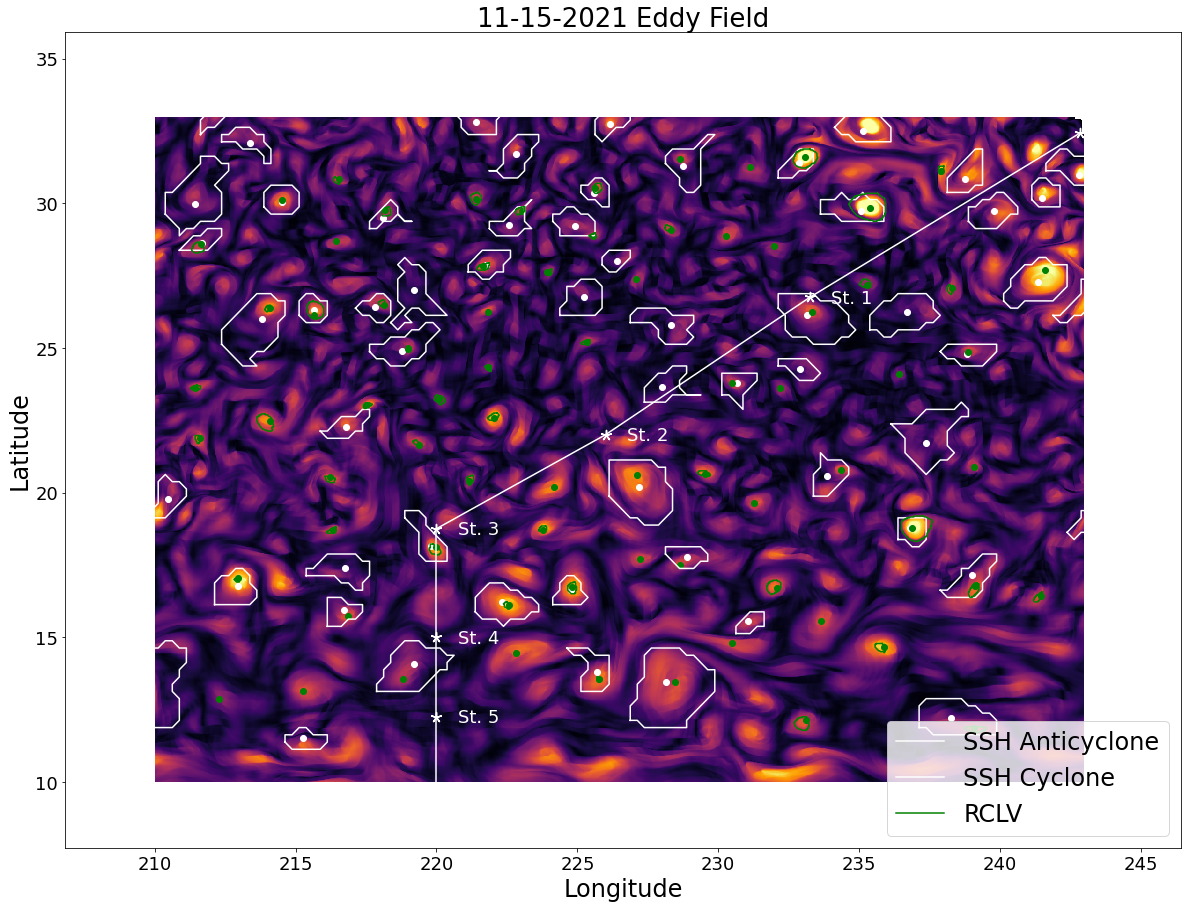

In [8]:
plot_eddy_field_transect(date,station_lats,station_lons,anti_eddy_data,cyc_eddy_data,cons,plms,1)

## Zoom in

Start time: 2021-11-18 08:00:00
Stop time: 2021-11-18 20:00:00

Start during transit between station 0 and 1 at (32.43,-117.16)
Stop during transit between station 0 and 1 at (31.13,-119.35)


252.52 km in background waters from (32.43,242.84) to (31.13,240.65)


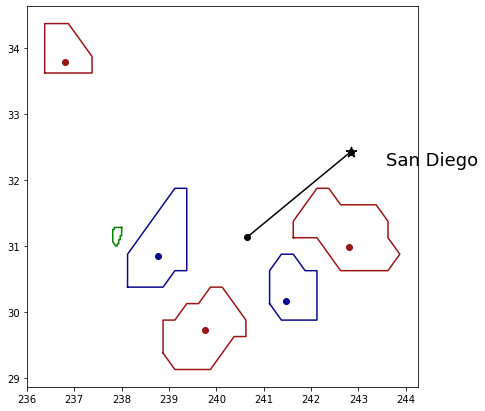

_______________________________________________

Start time: 2021-11-18 20:00:00
Stop time: 2021-11-19 08:00:00

Start during transit between station 0 and 1 at (31.13,-119.35)
Stop during transit between station 0 and 1 at (29.83,-121.54)


254.87 km in background waters from (31.13,240.65) to (29.83,238.46)


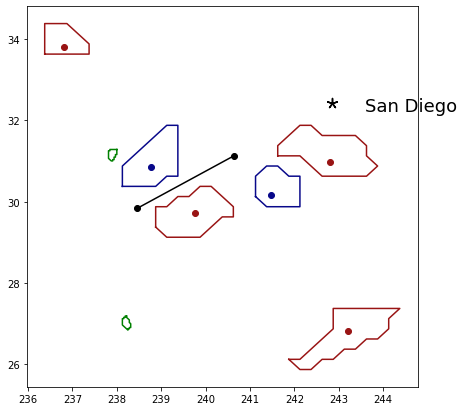

_______________________________________________

Start time: 2021-11-19 08:00:00
Stop time: 2021-11-19 20:00:00

Start during transit between station 0 and 1 at (29.83,-121.54)
Stop during transit between station 0 and 1 at (28.54,-123.74)


257.14 km in background waters from (29.83,238.46) to (28.54,236.26)


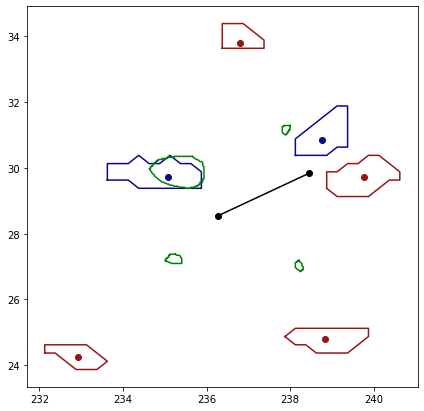

_______________________________________________

Start time: 2021-11-19 20:00:00
Stop time: 2021-11-20 08:00:00

Start during transit between station 0 and 1 at (28.54,-123.74)
Stop during transit between station 0 and 1 at (27.24,-125.93)


259.32 km in background waters from (28.54,236.26) to (27.24,234.07)


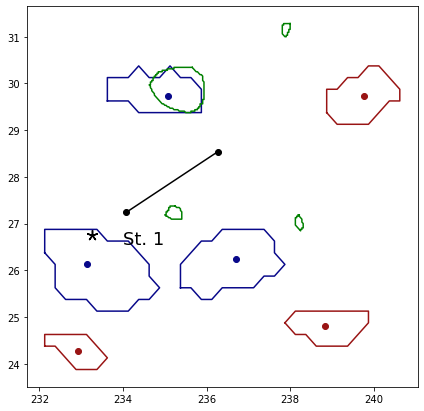

_______________________________________________

Start time: 2021-11-20 08:00:00
Stop time: 2021-11-20 20:00:00

Start during transit between station 0 and 1 at (27.24,-125.93)
Arrive at station 1 (22,-134) at 2021-11-20 12:30:00
Leave station 1 at 2021-11-20 19:30:00
Stop during transit between station 1 and 2 at (26.41,-127.27)


78.9 km in background waters from (27.24,234.07) to (26.83,233.42)
82.7 km in SSH eddy from (26.83,233.42) to (26.41,232.73)


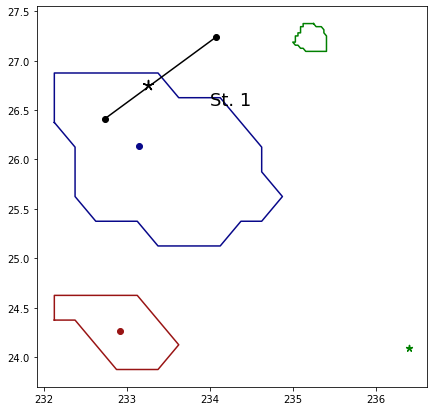

_______________________________________________

Start time: 2021-11-20 20:00:00
Stop time: 2021-11-21 08:00:00

Start during transit between station 1 and 2 at (26.69,-126.84)
Stop during transit between station 1 and 2 at (25.35,-128.88)


101.29 km in SSH eddy from (26.69,233.16) to (26.16,232.34)
151.84 km in background waters from (26.16,232.34) to (25.35,231.12)


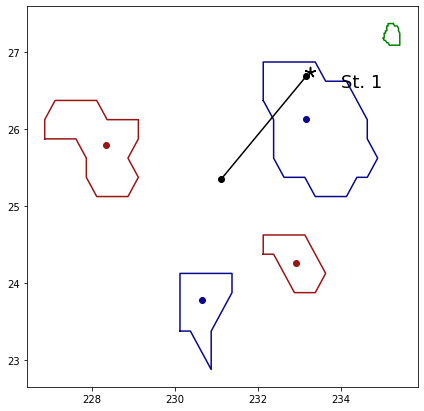

_______________________________________________

Start time: 2021-11-21 08:00:00
Stop time: 2021-11-21 20:00:00

Start during transit between station 1 and 2 at (25.35,-128.88)
Stop during transit between station 1 and 2 at (24.01,-130.93)


254.98 km in background waters from (25.35,231.12) to (24.01,229.07)


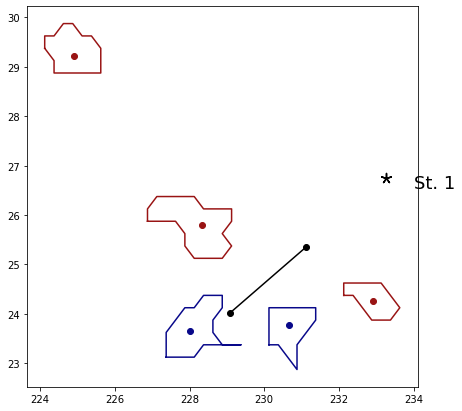

_______________________________________________

Start time: 2021-11-21 20:00:00
Stop time: 2021-11-22 08:00:00

Start during transit between station 1 and 2 at (24.01,-130.93)
Stop during transit between station 1 and 2 at (22.67,-132.98)


55.74 km in background waters from (24.01,229.07) to (23.72,228.62)
113.82 km in SSH eddy from (23.72,228.62) to (23.12,227.72)
87.18 km in background waters from (23.12,227.72) to (22.67,227.02)


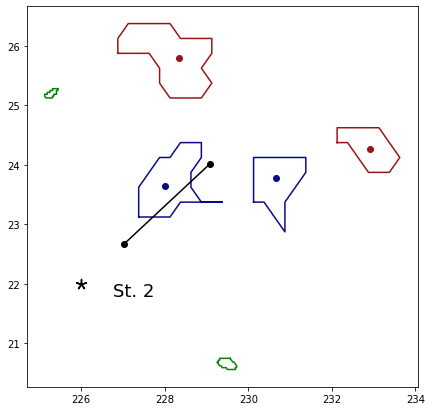

_______________________________________________

Start time: 2021-11-22 08:00:00
Stop time: 2021-11-22 20:00:00

Start during transit between station 1 and 2 at (22.67,-132.98)
Arrive at station 2 (18.75,-140) at 2021-11-22 14:00:00
Leave station 2 at 2021-11-22 18:00:00
Stop during transit between station 2 and 3 at (20.38,-137.0)


488.2 km in background waters from (22.67,227.02) to (20.38,223.0)


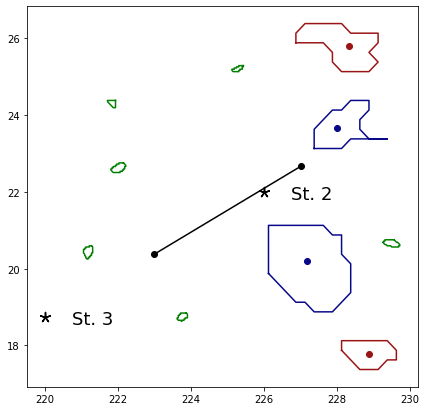

_______________________________________________

Start time: 2021-11-22 20:00:00
Stop time: 2021-11-23 08:00:00

Start during transit between station 2 and 3 at (21.8,-134.36)
Stop during transit between station 2 and 3 at (20.62,-136.55)


261.57 km in background waters from (21.8,225.64) to (20.62,223.45)


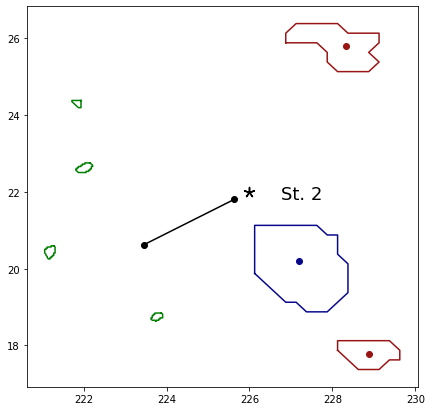

_______________________________________________

Start time: 2021-11-23 08:00:00
Stop time: 2021-11-23 20:00:00

Start during transit between station 2 and 3 at (20.62,-136.55)
Stop during transit between station 2 and 3 at (19.44,-138.73)


263.09 km in background waters from (20.62,223.45) to (19.44,221.27)


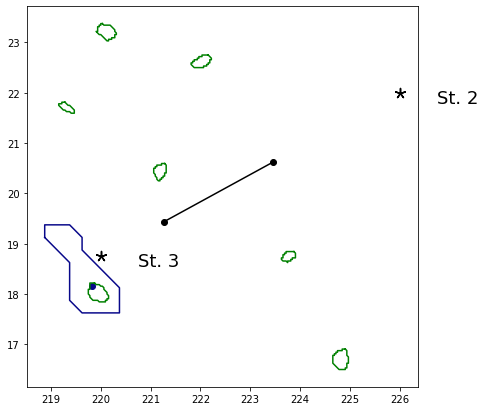

_______________________________________________

Start time: 2021-11-23 20:00:00
Stop time: 2021-11-24 08:00:00

Start during transit between station 2 and 3 at (19.44,-138.73)
Arrive at station 3 (18.75,-140) at 2021-11-24 03:00:00
Still at station 3 at 2021-11-24 08:00:00


154.15 km in background waters from (19.44,221.27) to (18.75,220)


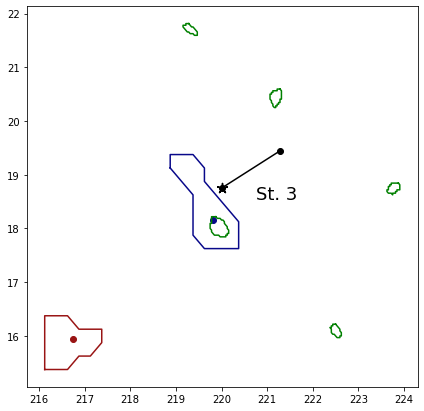

_______________________________________________

Start time: 2021-11-24 08:00:00
Stop time: 2021-11-24 20:00:00

Start at station 3 at (18.75,-140)
Will not leave the station during this time


0.0 km in background waters from (18.75,220) to (18.75,220)


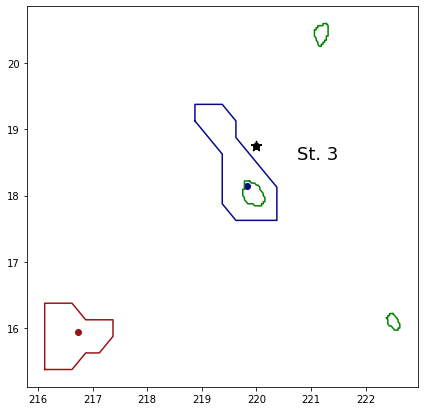

_______________________________________________

Start time: 2021-11-24 20:00:00
Stop time: 2021-11-25 08:00:00

Start at station 3 at (18.75,-140)
Will not leave the station during this time


0.0 km in background waters from (18.75,220) to (18.75,220)


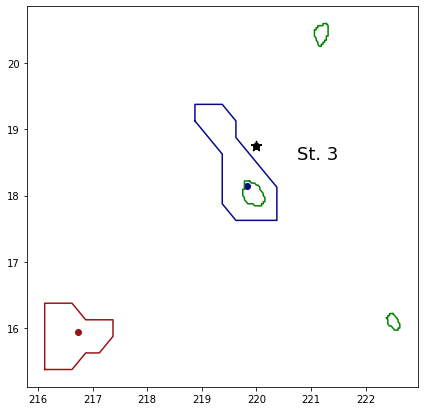

_______________________________________________

Start time: 2021-11-25 08:00:00
Stop time: 2021-11-25 20:00:00

Start at station 3 at (18.75,-140)
Leave station 3 at 2021-11-25 13:00:00
Stop during transit between station 3 and 4 at (17.4,-140.0)


27.8 km in background waters from (18.75,220) to (18.5,220.0)
34.75 km in SSH eddy from (18.5,220.0) to (18.19,220.0)
34.75 km in overlapping SSH eddy and RCLV from (18.19,220.0) to (17.88,220.0)
27.8 km in SSH eddy from (17.88,220.0) to (17.62,220.0)
24.59 km in background waters from (17.62,220.0) to (17.4,220.0)


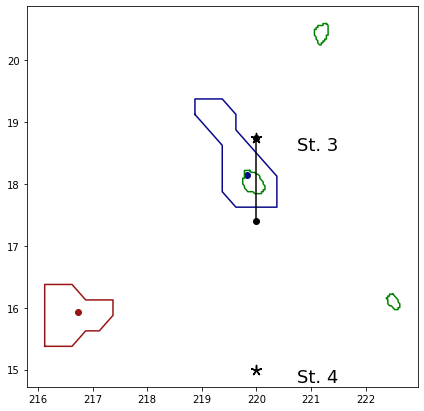

_______________________________________________

Start time: 2021-11-25 20:00:00
Stop time: 2021-11-26 08:00:00

Start during transit between station 3 and 4 at (17.4,-140.0)
Stop during transit between station 3 and 4 at (15.1,-140.0)


256.6 km in background waters from (17.4,220.0) to (15.1,220.0)


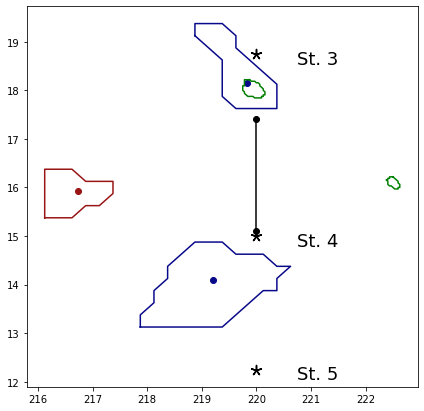

_______________________________________________

Start time: 2021-11-26 08:00:00
Stop time: 2021-11-26 20:00:00

Start during transit between station 3 and 4 at (15.1,-140.0)
Arrive at station 4 (12.25,-140) at 2021-11-26 08:30:00
Leave station 4 at 2021-11-26 12:30:00
Stop during transit between station 4 and 5 at (9.84,-140.0)


52.39 km in background waters from (15.1,220.0) to (14.62,220.0)
97.3 km in SSH eddy from (14.62,220.0) to (13.75,220.0)
434.36 km in background waters from (13.75,220.0) to (9.84,220.0)


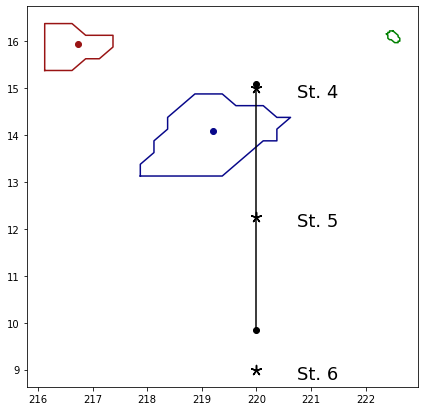

_______________________________________________

Start time: 2021-11-26 20:00:00
Stop time: 2021-11-27 08:00:00

Start during transit between station 4 and 5 at (13.58,-140.0)
Arrive at station 5 (12.25,-140) at 2021-11-27 03:00:00
Still at station 5 at 2021-11-27 08:00:00


147.62 km in background waters from (13.58,220.0) to (12.25,220)


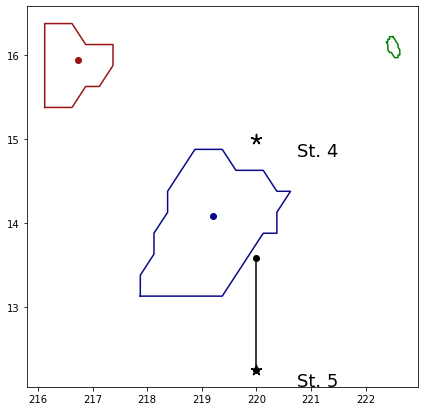

_______________________________________________

Start time: 2021-11-27 08:00:00
Stop time: 2021-11-27 20:00:00

Start at station 5 at (12.25,-140)
Will not leave the station during this time


0.0 km in background waters from (12.25,220) to (12.25,220)


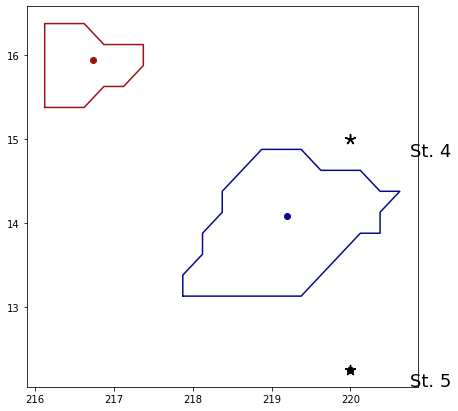

_______________________________________________

Start time: 2021-11-27 20:00:00
Stop time: 2021-11-28 08:00:00

Start at station 5 at (12.25,-140)
Will not leave the station during this time


0.0 km in background waters from (12.25,220) to (12.25,220)


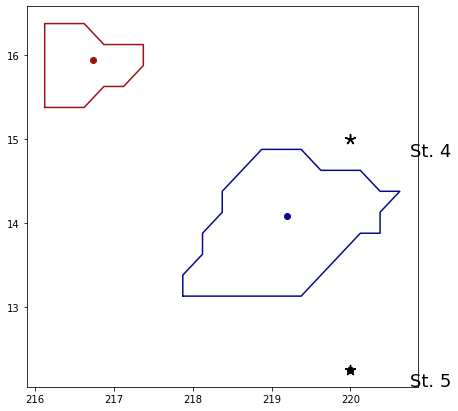

_______________________________________________

Start time: 2021-11-28 08:00:00
Stop time: 2021-11-28 20:00:00

Start at station 5 at (12.25,-140)
Leave station 5 at 2021-11-28 13:00:00
Stop during transit between station 5 and 6 at (10.91,-140.0)


148.8 km in background waters from (12.25,220) to (10.91,220.0)


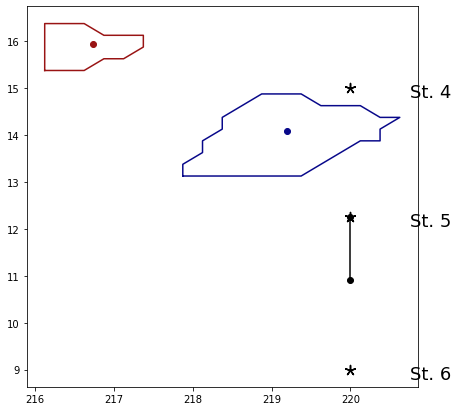

_______________________________________________



In [9]:
start_date = datetime.datetime(2021,11,18,8)
last_date = datetime.datetime(2021,11,28,20)

while start_date < last_date:
    str_date = str(start_date)[0:10].replace('-','')
    hour = int(str(start_date)[-8:-6])
    
    transect_lats,transect_lons = get_locations_along_traj(str_date,hour,12,station_lats,station_lons,station_arrivals,station_departures)
    print('\n')
    
    transect_eddy_action('20211115',transect_lats[0],transect_lons[0]+360,transect_lats[1],transect_lons[1]+360,anti_eddy_data,cyc_eddy_data,cons)
    
    # NOTE: Plot with the most recent date that we actually have eddy data for
    ax = plot_eddy_field_transect_zoom('20211115',station_lats,station_lons,transect_lats,transect_lons,anti_eddy_data,cyc_eddy_data,cons,plms)
    plt.show()
    
    print('_______________________________________________\n')
    
    start_date = start_date + datetime.timedelta(hours = 12)

## Sampling Plan

In [11]:
south_leg1_dist = distance_from_lat_lon(32.43,-117.16,18.75,-140)
st3_to_10Ndist = distance_from_lat_lon(18.75,-140,10,-140)

print('Diagonal to St 3 distance: %s'%(round(south_leg1_dist,2)))
print('Straight transect from St 3 to 10N distance: %s'%(round(st3_to_10Ndist,2)))
print('Total distance in eddy field: %s'%(round((south_leg1_dist + st3_to_10Ndist),2)))
print('Equidistant sampling method (80 sites): Sample every %s km'%(round((south_leg1_dist + st3_to_10Ndist)/80,2)))

Diagonal to St 3 distance: 2739.55
Straight transect from St 3 to 10N distance: 972.96
Total distance in eddy field: 3712.51
Equidistant sampling method (80 sites): Sample every 46.41 km


### a) Equidistant sampling

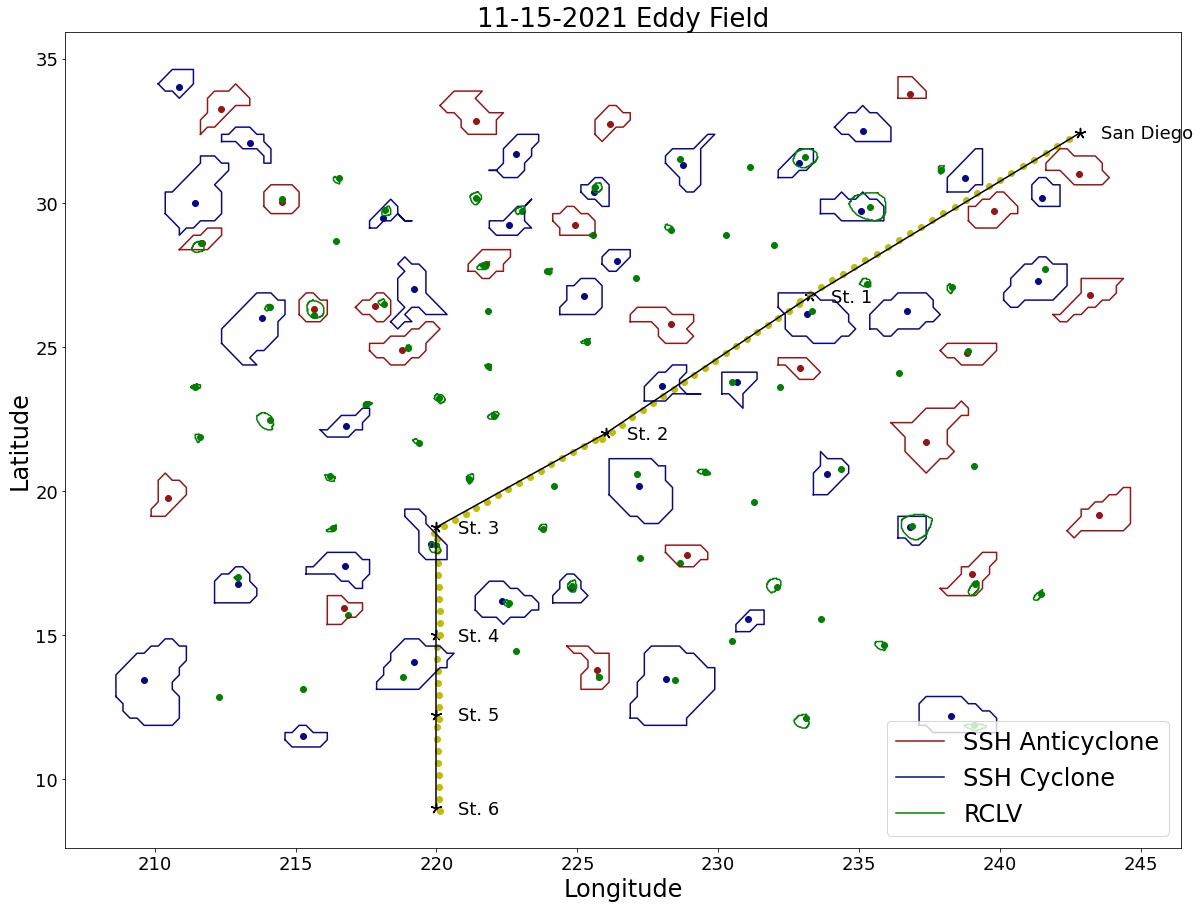

In [12]:
ax = plot_eddy_field_transect(date,station_lats,station_lons,anti_eddy_data,cyc_eddy_data,cons,plms,0)

for k in np.arange(0,len(station_lats)-1):
    bearing = bearing_from_lat_lon(station_lats[k],station_lons[k],station_lats[k+1],station_lons[k+1])

    sampling_lat,sampling_lon = station_lats[k],station_lons[k]
    while sampling_lat > station_lats[k+1]:
        sampling_lat,sampling_lon = find_lat_lon_end_point(sampling_lat,sampling_lon,46.41,bearing-2) 
        ax.scatter(sampling_lon+360,sampling_lat,c='y')

In [ ]:
start = datetime.datetime(2021,11,18,8)
stop = datetime.datetime(2021,11,18,20)

str_date = str(start)[0:10].replace('-','')
hour = int(str(start)[-8:-6])
    
transect_lats,transect_lons = get_locations_along_traj(str_date,hour,12,station_lats,station_lons,station_arrivals,station_departures)
print('\n')
    
transect_eddy_action(str_date,transect_lats[0],transect_lons[0],transect_lats[1],transect_lons[1],anti_eddy_data,cyc_eddy_data,cons)
    
# NOTE: Plot with the most recent date that we actually have eddy data for
ax = plot_eddy_field_transect_zoom('20211115',station_lats,station_lons,transect_lats,transect_lons,anti_eddy_data,cyc_eddy_data,cons,plms)
plt.show()

### b) Targeted Sampling

In [13]:
transect_lats,transect_lons = get_locations_along_traj('20211118',12,12,station_lats,station_lons,station_arrivals,station_departures)


Start time: 2021-11-18 12:00:00
Stop time: 2021-11-19 00:00:00

Start during transit between station 0 and 1 at (32.0,-117.89)
Stop during transit between station 0 and 1 at (30.7,-120.08)


In [14]:
transect_eddy_action(date,transect_lats[0],transect_lons[0],transect_lats[1],transect_lons[1],anti_eddy_data,cyc_eddy_data,cons)

253.31 km in background waters from (32.0,-117.89) to (30.7,-120.08)
